# Gradient Descent, Chain Rule and (oversimplified) Automatic Differentiation

As we have seen in Notebook 1.A we calculate the gradients to update our weights.
This notebook is intendet to go a bit deeper in to the optimization part
First we will give an brief overview 

Let us consider a very simple case: a quadratic function $f: \mathbb{R} \rightarrow \mathbb{R}$
<br><center>
       $f(x) = x^2$ 
</center>
Finding the minimum requires no calculation, but still it is usfull to explain some basic concepts. So first, let us plot the function.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from typing import Callable, Union

In [2]:
sns.set_theme()
sns.set_style("darkgrid")

In [5]:
# x² (will be a todo for the lecture)
def f(x: Union[np.array, float]) -> Union[np.array, float]:
    fx = x*x
    return fx

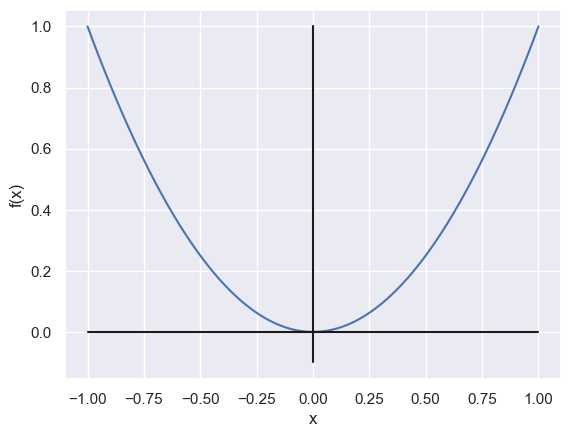

In [6]:
# evaluate true function values in the interval [0,100] on 1000 points
x = np.linspace(-1,1,1000)
fx = f(x)
# plot of our true function
plt.plot(x,fx)
plt.xlabel('x')
plt.ylabel('f(x)')

# plot coord
plt.plot(x, x*0, 'k')
plt.plot([0,0],[-0.1,1] , 'k')


plt.show()

We immediately see that the minimum is at $x = 0$. We also can simply calcluated it by taking the derivative, setting it to zero and sovle for x
<br><center>
        $ f'(x)  = 2x \overset{!}{=} 0  \iff x = 0$
</center>
where the prime mark $'$ stands for the derivative, i.e. $f'(x) \equiv \frac{d f}{d x}$. 
Let us implement the derivative as well:

In [7]:
def df(x: Union[np.array, float]) -> Union[np.array, float]:
    return 2*x

We are only able to do this because our fucntion is so simple. The normal case is, that we can not just calculate the minimum analytically. So what can we do in this case?
Well, we know that the derivative gives us the slope of function $f$ at position $x$. And from this slope we get information in which direction we need to move. Lets visualize that below


In [8]:
# implement plotting functions
def plot_fun(x: Union[np.array, float], f: Callable) -> None:
    # plot function
    fx = f(x)
    plt.plot(x,f(x))
    plt.xlabel('x')
    plt.ylabel('f(x)')
    
    # plot coord
    border = 0.1*(max(fx) - min(fx))
    plt.ylim([min(fx) - border, max(fx) + border])
    plt.xlim([min(x), max(x)])
    plt.plot(x, x*0, 'k')
    plt.plot([0,0],[min(fx) - border,max(fx) + border] , 'k')

    
def plot_tangent(x_0: Union[np.array, float], 
                 x: Union[np.array, float],
                 f:Callable,
                 df:Callable, 
                 alpha: float=1.) -> None:
    dfx_0 = df(x_0)
    fx_0 = f(x_0)
    g = dfx_0*(x - x_0) + fx_0
    
    # plot tangent
    plt.plot(x, g, color='orange', alpha=alpha)

def plot_indicator(x_0: Union[np.array, float], 
                   f:Callable, 
                   text: bool=True) -> Union[np.array, float]:
    # indicate function value 
    fx_0 = f(x_0)
    plt.plot([x_0,x_0], [0,fx_0], 'g')
    if text:
        plt.text(x_0, fx_0, f"f({x_0})", color='green')
    plt.plot(x_0,fx_0, 'o', color='green')
    return fx_0
    
def plot_connector(x_0: float, 
                   x_1: float, 
                   fx_0: float, 
                   fx_1: float, 
                   alpha: float=0.4) -> None:
    plt.plot([x_0, x_1], [fx_0, fx_1], color='r', alpha=alpha)
    
    
    

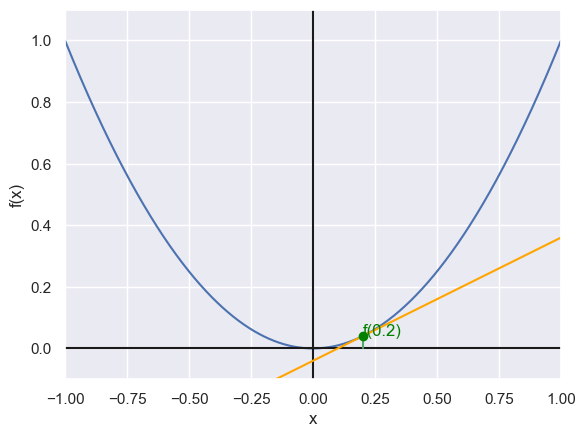

In [9]:
x = np.linspace(-1,1,1000)
plot_fun(x, f)
x_0 = 0.2
plot_tangent(x_0, x, f, df)
plot_indicator(x_0, f)
plt.show()

We see, that if we move along the direction where our tenagent decreses, we also decrease our function value. We can express that in an equation:
<br><center>
    $ x_{new}  = x - f'(x)$
</center> 

Lets see what happens if we do that for our current value:
<br><center>
    $ x_{new}  = 0.5 - 1 = -0.5$
</center> 

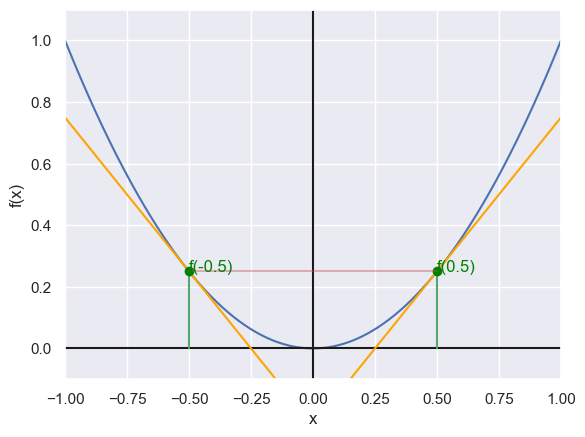

In [10]:
x = np.linspace(-1,1,1000)
plot_fun(x, f)
x_old = None
f_old = None
for x_0 in [-0.5, 0.5]:
    plot_tangent(x_0, x, f, df)
    f_x = plot_indicator(x_0, f)
    if x_old is not None:
        plot_connector(x_old, x_0, f_old, f_x)
    x_old = x_0
    f_old = f_x
plt.show()

We just jumped to the other side and are in the same situation as before, only mirrored. Obviousely, the direction is the right one, but the jump is too large. So, lets introduce a value $\lambda > 0$ and call it the __**learning rate**__. The new update is
<br><center>
    $ x_{new}  = x - \lambda f'(x)$
</center> 

Now, lets start again at $x = 0.5$. Lets do some iterations and plot them:

[1/7] f(x) = 0.25000, x = 0.50000
[2/7] f(x) = 0.16000, x = -0.40000
[3/7] f(x) = 0.10240, x = 0.32000
[4/7] f(x) = 0.06554, x = -0.25600
[5/7] f(x) = 0.04194, x = 0.20480
[6/7] f(x) = 0.02684, x = -0.16384
[7/7] f(x) = 0.01718, x = 0.13107
Value for x at last iteration: -0.10486


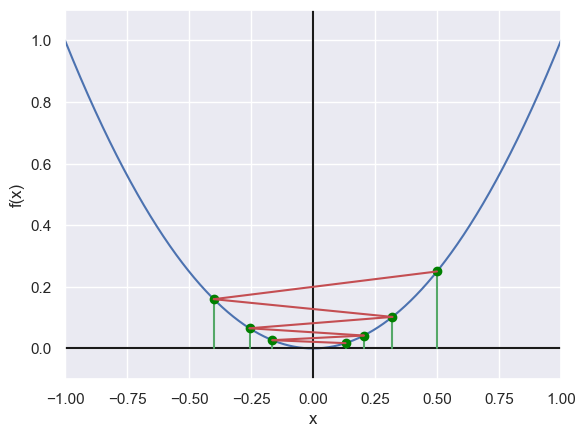

In [11]:
# plot f
x = np.linspace(-1,1,1000)
plot_fun(x, f)

# define some variables to store values of last iteration
x_old, f_old = None, None

# define the number of updates
num_iter = 7

# define the learning rate 
# (you can play around with it and see how the updates change)
lr = 0.9 

# again we start at x=0.5
x_0 = 0.5

# start iterations
for i in range(num_iter):
    # update plot
    f_x = plot_indicator(x_0, f, text=False)
    if x_old is not None:
        plot_connector(x_old, x_0, f_old, f_x, alpha=1)
    x_old = x_0
    f_old = f_x
    
    # gradient descent update: caluclate new x_0 
    x_0 = x_0 - lr *  2*x_0
    
    # plot current value of fx
    print(f'[{i+1}/{num_iter}] f(x) = {f_x:.5f}, x = {x_old:.5f}')

print(f'Value for x at last iteration: {x_0:.5f}')
plt.show()

If you play around with the learning rate you will see, that some learning rates work better then others. E.g. 
 * if you use a learning rate $\lambda > 1$ the updates diverge 
 * if we have a learning rate $\lambda \in (0,1)$ but either close to $1$ or $0$ the progress if very slow 
 
 For this spcific example, there is an optimal learning rate where we immediately jump to the solution (can you guess which one?). But in gereral we need to find out which learning rate works best by trying out multiple of them.
 > __**Note**__: The learning rate will be one of the most important __hyper paramters__. Finding a good learning rate will be cruxial to the performance of your neural networks!
 
 The above example was very simple, so lets make our lives harder. Let us suppose we have a second function that has the output of our first function as input, i.e we have a __function composition__ or __chain of functions__:
<center> 
    $ h(x)  = g(f(x))$
</center>
Let us define the function $g$ as 
<center> 
    $g(x) = 1 - e^{-x}$
</center>
and implement it.

In [12]:
def g(x: Union[np.array, float]) -> Union[np.array, float]:
    # torch.exp can't handle floats
    # np.exp can handle float and torch.tensors !!!as long!!! the tensors ar not on the gpu
    ex = np.exp(-x)
    gx = 1-ex
    return gx
    

Let us plot the function $g$

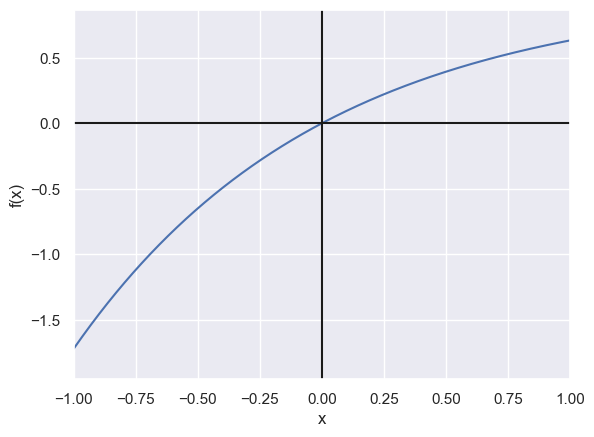

In [13]:
x = np.linspace(-1,1,1000)
plot_fun(x, g)

Now let us implement a function $compose$ that chains two functions and returns the composition it. Then let us plot the composition $h(x) = g(f(x))$

In [14]:
def compose(g: Callable, f: Callable) -> Callable:
    return lambda x: g(f(x))

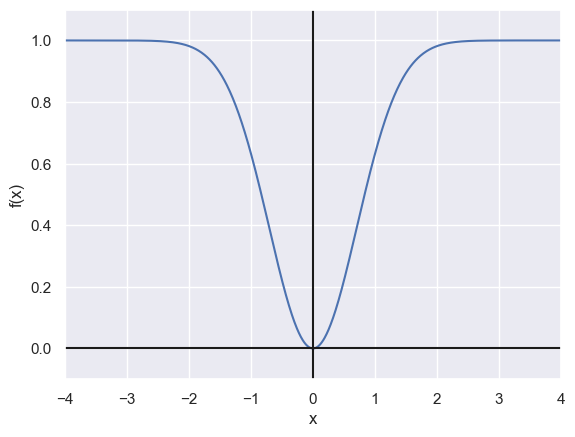

In [15]:
x = np.linspace(-4,4,1000)
h = compose(g,f)
plot_fun(x, h)

Again, we want to perform gradient descent on ths function $h$. But how do we calculate the derivative $h'$? Here the __**chain rule**__ comes to help. The chain rule states, that if we have a function composition $y = h(x) = g(f(x))$ and we want to calculate the derivative of $h$ w.r.t $x$, we can do so the following way:
<center> 
    $ h'(x)  = g'(f(x))f'(x)$
</center>
To avoid confusion, we want to be a bit more precice and rewrite the above formular. If we denote the output of our first function as $a = f(x)$ we can write 
<center> 
    $y =  g(a) = g(f(x))$
</center>
and the derivative can be written as
<center> 
    $ \frac{dh(x)}{dx}  =  \frac{dy}{da} \frac{da}{dx} = \frac{dg(a)}{da} \frac{df(x)}{dx} $
</center>
The chain rule gives us a very simple way to calculate teh derivative of function compisitions. To get the derivative of the whole composition, we just need to calculate the derivative of each function in the composition, evaluate them at the right value and compose and multiply the results in the right way.

Let us first calculate the derivative of our composition analytically and implement it. Then, we just implement the derivative for each function, multiply it and compare the results.

<br>
As written above, the derivative of the composed function is $g'(f(x))f'(x)$. 
We already know that
<center>
    $f'(x) = 2x$
</center>
We still need to caluclate $g'$. We have 
<center>
    $g(x) = 1 - e^{-x}$
</center>
thus
<center>
    $\frac{g(x)}{dx} = \frac{d1}{dx} - \frac{de^{-x}}{dx} = e^{-x}$
</center>
Combined we have
<center>
    $\frac{h(x)}{dx} = 2xe^{-x^2}$
</center>
Let us implement the full derivative and plot the tangent at some points to see if the we calculated it correctly:

In [16]:
def dh(x: Union[ np.array, float]) -> Union[np.array, float]:
    return 2*x*np.exp(-x*x)

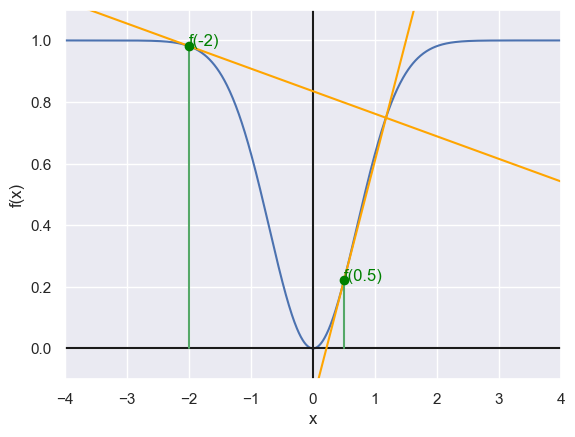

In [17]:
x = np.linspace(-4,4,1000)
h = compose(g,f)
plot_fun(x, h)
for x_0 in [-2, 0.5]:
    plot_tangent(x_0, x, h, dh)
    f_x = plot_indicator(x_0, h)
    x_old = x_0
    f_old = f_x
plt.show()

As we did implicitely when caluclate the whole derivative, we can compose the derivatives programmatically. We have to do two things. 
* we need to compose the derivative $g'$ and the function $f$ 
* we need to multiply the above derivative and the derivative $f'$

First lets implement the derivative of $g$


In [18]:
def dg(x: Union[np.array, float]) -> Union[np.array, float]:
    return np.exp(-x)

And now lets create a function that creates calculates the derivative given the derivatives of our atomic functions and check it like above

In [19]:
def chainrule(dg: Callable, df: Callable, f: Callable) -> Callable:
    dgf = compose(dg, f)
    return lambda x: dgf(x)*df(x)

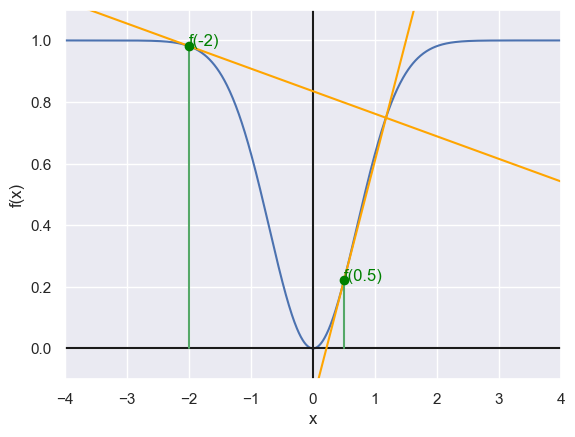

In [20]:
x = np.linspace(-4,4,1000)
h = compose(g,f)
dh_aut = chainrule(dg, df, f)
plot_fun(x, h)
for x_0 in [-2, 0.5]:
    plot_tangent(x_0, x, h, dh_aut)
    f_x = plot_indicator(x_0, h)
    x_old = x_0
    f_old = f_x
plt.show()

And indeed, the function creates the right derivative! So now, what we can do is to implement many functions and their derivatives, chain them and immediately get the excat derivative back! Lets try this out with some simple functions!

In [21]:
# identity function, forward and backward
# f(x) = x
def ident(x: Union[np.array, float]) -> Union[float, np.array]:
    return x
def dident(x: Union[float, np.array]) -> Union[float, np.array]:
    if isinstance(x, (np.floating, float)):
        x = np.array([x])
    s = np.sign(x)
    s[s==0] = 1.
    return np.ones_like(x)*s
#========================================================

# minus function forward and backward
# f(x) = -x
def minus(x: Union[float, np.array]) -> Union[float, np.array]:
    return -x
def dminus(x: Union[float, np.array]) -> Union[float, np.array]:
    return -np.ones_like(x)
#=========================================================


# exponetial function, only backward, can use np.exp as forward
# f(x) = exp(x)
def dexp(x: Union[float, np.array]) -> Union[float, np.array]:
    return np.exp(x)
#=========================================================

# sum with constant and backward
# f(x) = x + c
def add_constant(c: float) -> Callable:
    return lambda x: x + c

def dadd_constant(x: Union[float, np.array]) -> Union[float, np.array]:
    return dident(x)
#=========================================================


# multiply with constant and backward
# f(x) = c*x
def mult_constant(c: float) -> Callable:
    return lambda x: x*c

def dmult_constant(c: float) -> Callable:
    return lambda x: c
#=========================================================


# f(x) = 1/x forward and backward
def div(x: Union[float, np.array]) -> Union[float, np.array]:
    return 1./x # will throw error for x = 0

def ddiv(x: Union[float, np.array]) -> Union[float, np.array]:
    return -1./(x*x) # will throw errror for x = 0
#=========================================================




Now, let us write a small class that is initialized with a sequence of functions and their derivatives and then is able to calculate the funciton and the derivative. 

In [22]:
class Composer:
    def __init__(self, fun_div_tuples):
        self.f = [f[0] for f in fun_div_tuples]
        self.df = [f[1] for f in fun_div_tuples]
        
        self.forward_graph = []
    
    def compose_forward(self) -> Callable:
        g = ident
        self.forward_graph = [g]
        for f in self.f:
            g = compose(f,g)
            self.forward_graph.append(g)
        return g
    
    @staticmethod
    def _mult(f: Callable, g: Callable):
        return lambda x: f(x)*g(x)
        
    
    def compose_backward(self) -> Callable:
        assert self.forward_graph, 'compose_forward has not been called'
        # walk through functions reversed
        ret = None
        for i in range(len(self.df)):
            out = compose(self.df[i], self.forward_graph[i]) 
            if ret is not None:
                ret = self._mult(out, ret)
            else:
                ret = out
        return ret

Now let us compose the so called __**sigmoid**__ function $\sigma(x) = \frac{1}{1 + e^{-x}}$. 

In [23]:
functions = [
    (minus, dminus), # -x 
    (np.exp, dexp),  # exp(-x)
    (add_constant(1), dadd_constant), # 1 + exp(-x)
    (div, ddiv) # 1/(1+exp(-x))
]

composer = Composer(functions)
sigmoid = composer.compose_forward()
dsigmoid = composer.compose_backward()

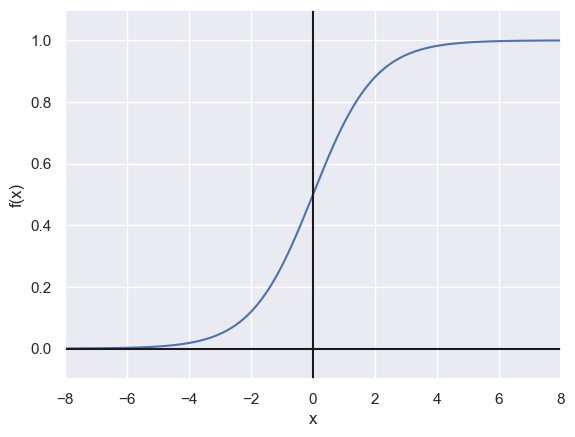

In [24]:
x = np.linspace(-8,8,1000)
plot_fun(x, sigmoid)

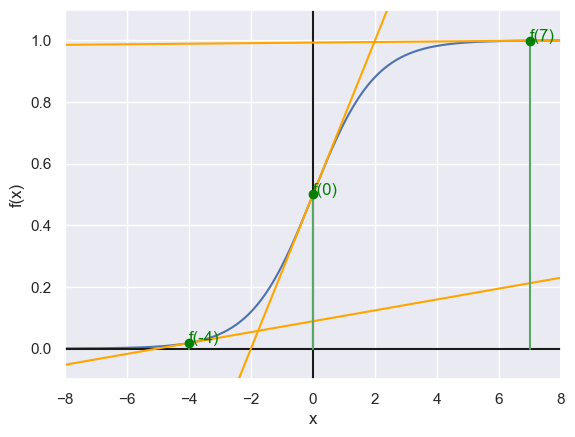

In [25]:
x = np.linspace(-8,8,1000)
plot_fun(x, sigmoid)
for x_0 in [-4, 0, 7]:
    plot_tangent(x_0, x, sigmoid, dsigmoid)
    f_x = plot_indicator(x_0, sigmoid)
    x_old = x_0
    f_old = f_x
plt.show()

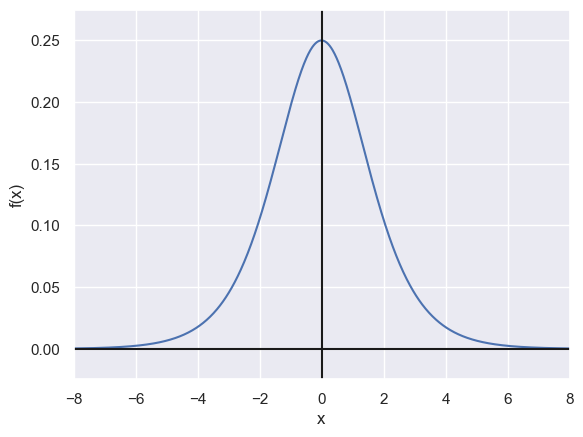

In [26]:
# we can even plot the derivative of the sigmoid
x = np.linspace(-8,8,1000)
plot_fun(x, dsigmoid)

 Keep in mind, that this is a very simplyfied version of automatic differentiation! For example, the following function would be impossible to implement with our framework as composition! We would need to provide the forward and backward step explicitly. (Do you know why?)
<center>
    $f(x) = x ~ \cos(x)$
</center>

In [27]:
# f(x) = x*cos(x) forward and backward
def xcosx(x: Union[float, np.array]) -> Union[float, np.array]:
    return x*np.cos(x)

def dxcosx(x: Union[float, np.array]) -> Union[float, np.array]:
    return np.cos(x) - x*np.sin(x)
#=========================================================



In [28]:
functions = [(xcosx, dxcosx)]

composer = Composer(functions)
u = composer.compose_forward()
du = composer.compose_backward()

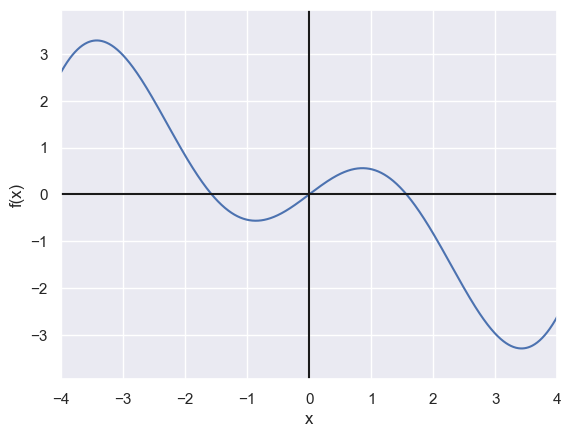

In [29]:
x = np.linspace(-4,4,1000)
plot_fun(x, u)

Before we go to the next notebook where we move to multible variables and use PyTorch, let us try to find the minimum of this function in the interval of [-4,4]

[1/7] f(x) = 0.54030, x = 1.00000
[2/7] f(x) = 0.48770, x = 1.12047
[3/7] f(x) = 0.29580, x = 1.34987
[4/7] f(x) = -0.38735, x = 1.78904
[5/7] f(x) = -2.17102, x = 2.57428
[6/7] f(x) = -3.28537, x = 3.46495
[7/7] f(x) = -3.28746, x = 3.40382
Value for x at last iteration: 3.43719


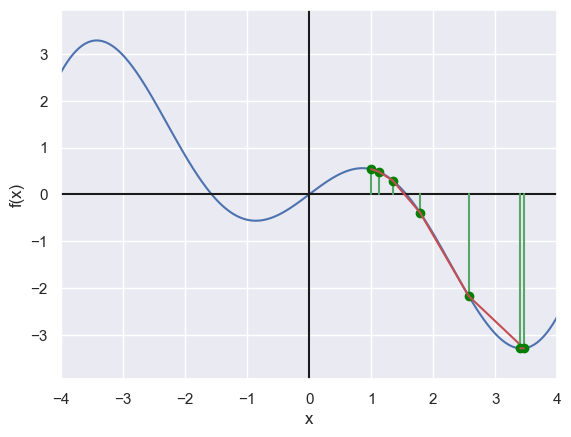

In [30]:
# plot f
x = np.linspace(-4,4,1000)
plot_fun(x, u)

# define some variables to store values of last iteration
x_old, f_old = None, None

# define the number of updates
num_iter = 7

# define the learning rate 
# (you can play around with it and see how the updates change)
lr = 0.4

# again we start at x=0.5
x_0 = 1

# start iterations
for i in range(num_iter):
    # update plot
    f_x = plot_indicator(x_0, u, text=False)
    if x_old is not None:
        plot_connector(x_old, x_0, f_old, f_x, alpha=1)
    x_old = x_0
    f_old = f_x
    
    # gradient descent update: caluclate new x_0 
    x_0 = x_0 - lr *  du(x_0)
    
    # plot current value of fx
    print(f'[{i+1}/{num_iter}] f(x) = {f_x:.5f}, x = {x_old:.5f}')

print(f'Value for x at last iteration: {x_0:.5f}')
plt.show()

Lets also make a torch version of the above and use a torch optimizer! First we must rewrite our composer for torch. This is surprisingly simple, just swap np.array for torch.Tensor and np. with torch.

In [33]:
import torch

# identity function, forward and backward
# f(x) = x
def ident(x: Union[torch.Tensor, float]) -> Union[float, torch.Tensor]:
    return x
def dident(x: Union[float, torch.Tensor]) -> Union[float, torch.Tensor]:
    if isinstance(x, (np.floating, float)):
        x = torch.array([x])
    s = torch.sign(x)
    s[s==0] = 1.
    return torch.ones_like(x)*s
#========================================================

# minus function forward and backward
# f(x) = -x
def minus(x: Union[float, torch.Tensor]) -> Union[float, torch.Tensor]:
    return -x
def dminus(x: Union[float, torch.Tensor]) -> Union[float, torch.Tensor]:
    return -torch.ones_like(x)
#=========================================================


# exponetial function, only backward, can use np.exp as forward
# f(x) = exp(x)
def dexp(x: Union[float, torch.Tensor]) -> Union[float, torch.Tensor]:
    return torch.exp(x)
#=========================================================

# sum with constant and backward
# f(x) = x + c
def add_constant(c: float) -> Callable:
    return lambda x: x + c

def dadd_constant(x: Union[float, torch.Tensor]) -> Union[float, torch.Tensor]:
    return dident(x)
#=========================================================


# multiply with constant and backward
# f(x) = c*x
def mult_constant(c: float) -> Callable:
    return lambda x: x*c

def dmult_constant(c: float) -> Callable:
    return lambda x: c
#=========================================================


# f(x) = 1/x forward and backward
def div(x: Union[float, torch.Tensor]) -> Union[float, torch.Tensor]:
    return 1./x # will throw error for x = 0

def ddiv(x: Union[float, torch.Tensor]) -> Union[float, torch.Tensor]:
    return -1./(x*x) # will throw errror for x = 0
#=========================================================


# f(x) = x*cos(x) forward and backward
def xcosx(x: Union[float, torch.Tensor]) -> Union[float, torch.Tensor]:
    return x*torch.cos(x)

def dxcosx(x: Union[float, torch.Tensor]) -> Union[float, torch.Tensor]:
    return torch.cos(x) - x*torch.sin(x)
#=========================================================


In [34]:
functions = [(xcosx, dxcosx)]

composer = Composer(functions)
u = composer.compose_forward()
du = composer.compose_backward()

[1/7] f(x) = 0.43879, x = 0.50000
[2/7] f(x) = 0.23755, x = 0.24485
[3/7] f(x) = -0.11862, x = -0.11948
[4/7] f(x) = -0.44568, x = -0.51093
[5/7] f(x) = -0.55086, x = -0.75991
[6/7] f(x) = -0.56069, x = -0.84048
[7/7] f(x) = -0.56108, x = -0.85687
Value for x at last iteration: -0.85974


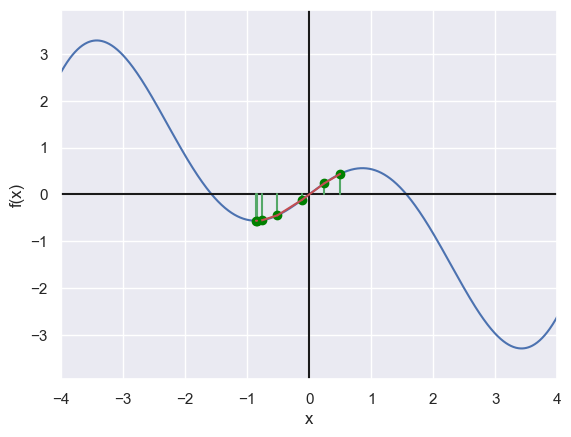

In [35]:
import torch
# plot f
x = torch.linspace(-4,4,1000)
plot_fun(x, u)

# define some variables to store values of last iteration
x_old, f_old = None, None

# define the number of updates
num_iter = 7

# define the learning rate 
# (you can play around with it and see how the updates change)
lr = 0.4

# again we start at x=0.5
x_0 = torch.tensor(0.5, requires_grad=True)

# get opimizer!
sgd = torch.optim.SGD([x_0], lr=lr)

# start iterations
for i in range(num_iter):
    # update plot
    f_x = plot_indicator(x_0.detach(), u, text=False)
    if x_old is not None:
        plot_connector(x_old, x_0.detach(), f_old, f_x, alpha=1)
    x_old = x_0.item()
    f_old = f_x.item()
    
    # calculate function value and gradient 
    sgd.zero_grad()
    fx = u(x_0)
    fx.backward()
    sgd.step()
    
    # plot current value of fx
    print(f'[{i+1}/{num_iter}] f(x) = {f_x:.5f}, x = {x_old:.5f}')

print(f'Value for x at last iteration: {x_0:.5f}')
plt.show()

Play around with the start value x_0  and the learning rate! Clearly, which minimum we end up is strongly dependent on this two factors!

Assignment: we created the sigmoid function. there are many more acitvation functions. Go to https://en.wikipedia.org/wiki/Activation_function implement: tanh, ReLu, and the softplus activation functions! 